# 1.分类模型

In [93]:
# 导入相关的python包

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
# import lightgbm as lgb
# from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

import warnings
warnings.filterwarnings('ignore')

以上库都是pip install 安装就好，如果电脑有python3环境，可以pip3 install 。或者直接在notebook中'!pip3 install ****'安装。

In [2]:
# 显示所有列, 全局设置打印选项.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2. 读取文件

In [41]:
# 读取加载数据
df = pd.read_csv("data.csv", low_memory=False)

In [42]:
# 查看前5行数据
df.head()

,CUST_ID,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHAN

## 2.1 总体了解

查看数据集的样本个数和原始特征维度 

In [43]:
# 查看所有的列名
cols = df.columns.tolist()

# 查看一下具体的列名，理解已经给出具体的特征含义
cols

['CUST_ID',
 'OPEN_ORG_NUM',
 'IDF_TYP_CD',
 'GENDER',
 'bad_good',
 'LAST_OPEN_TENURE_DAYS',
 'G_OS_PRCP_SUM',
 'OS_PRCP_SUM_THREE',
 'OS_PRCP_SUM_SIX',
 'guozhai_flag',
 'L3_DR_AMT',
 'L3_DR_CNT',
 'DR_AMT',
 'DR_CNT',
 'L3_CR_AMT',
 'L3_CR_CNT',
 'CR_AMT',
 'CR_CNT',
 'CUST_ACCOUNT_CNT',
 'CUST_PRODUCT_CNT',
 'CUST_SAVING_AMT',
 'CUST_FINA_AMT',
 'CUST_PRIFINA_AMT',
 'CUST_FOND_AMT',
 'CUST_NADEBT_AMT',
 'CUST_YBT_AMT',
 'CUST_METAL_AMT',
 'CUST_AUM',
 'CUST_EUP_ACCT_FLAG',
 'CUST_AU_ACCT_FLAG',
 'CUST_SALARY_FINANCIAL_FLAG',
 'CUST_SOCIAL_SECURITYIC_FLAG',
 'CUST_MTFLOW_FLAG',
 'CUST_DOLLER_FLAG',
 'CUST_INTERNATIONAL_GOLD_FLAG',
 'CUST_INTERNATIONAL_COMMON_FLAG',
 'CUST_INTERNATIONAL_SIL_FLAG',
 'CUST_INTERNATIONAL_DIAMOND_FLAG',
 'CUST_GOLD_COMMON_FLAG',
 'CUST_STAD_PLATINUM_FLAG',
 'CUST_LUXURY_PLATINUM_FLAG',
 'CUST_PLATINUM_FINANCIAL_FLAG',
 'CUST_DIAMOND_FLAG',
 'CUST_INFINIT_FLAG',
 'CUST_BUSINESS_FLAG',
 'CUST_ASSET_AMT',
 'CUST_DEBT_AMT',
 'CUST_TENURE_MONTHS',
 'CUST_ACCO

In [44]:
# 查看数据规模，这个CSV文件里面有285285行数据，627列数据
print('data shape:',df.shape)

data shape: (285285, 627)


In [45]:
# 通过info()来熟悉数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285285 entries, 0 to 285284
Columns: 627 entries, CUST_ID to L6_CHANNEL_TXN_DOUTTA_AVGCNT
dtypes: float64(399), int64(196), object(32)
memory usage: 1.3+ GB


In [46]:
# 或者通过dtypes来熟悉数据类型
df.dtypes

CUST_ID                               int64
OPEN_ORG_NUM                          int64
IDF_TYP_CD                           object
GENDER                               object
bad_good                              int64
LAST_OPEN_TENURE_DAYS                 int64
G_OS_PRCP_SUM                       float64
OS_PRCP_SUM_THREE                   float64
OS_PRCP_SUM_SIX                     float64
guozhai_flag                          int64
L3_DR_AMT                           float64
L3_DR_CNT                             int64
DR_AMT                              float64
DR_CNT                                int64
L3_CR_AMT                           float64
L3_CR_CNT                             int64
CR_AMT                              float64
CR_CNT                                int64
CUST_ACCOUNT_CNT                      int64
CUST_PRODUCT_CNT                      int64
CUST_SAVING_AMT                     float64
CUST_FINA_AMT                       float64
CUST_PRIFINA_AMT                

In [47]:
# 总体粗略的查看数据集各个特征的一些基本统计量
df.describe()

,CUST_ID,OPEN_ORG_NUM,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_INSURE_CNT,CHANNEL_CTR_GLOAN_AMT,CHANNEL_CTR_GLOAN_CNT,L3_CHANNEL_CTR_FUND_MONTHAVG_AMT,L3_CHANNEL_CTR_FUND_MONTHAVG_CNT,L3_CHANNEL_CTR_FINANCIAL_MONTHAV,L3_CHANNEL_CTR_FINANCIAL_MONTHA0,L3_CHANNEL_CTR_INSURE_MONTHAVG_A,L3_CHANNEL_CTR_INSURE_MONTHAVG_C,L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN,L6_CHANNEL_CTR_FUND_MONTHAVG_AMT,L6_CHANNEL_CTR_FUND_MONTHAVG_CNT,L6_CHANNEL_CTR_FINANCIAL_MONTHAV,L6_CHANNEL_CTR_FINANCIAL_MONTHA0,L6_CHANNEL_CTR_INSURE_MONTHAVG_A,L6_CHANNEL_CTR_INSURE_MONTHAVG_C,L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM,L6_CHANNEL_CTR_GLOAN_MO

## 2.2 查看数据集中特征缺失值，唯一值等 

In [48]:
# 查看所有数据有没有缺失值， 结果没有缺失值
print(f'There are {df.isnull().any().sum()} columns in dataset with missing values.')

There are 0 columns in dataset with missing values.


In [49]:
#查看缺失值情况
df.isnull().sum()

CUST_ID                             0
OPEN_ORG_NUM                        0
IDF_TYP_CD                          0
GENDER                              0
bad_good                            0
LAST_OPEN_TENURE_DAYS               0
G_OS_PRCP_SUM                       0
OS_PRCP_SUM_THREE                   0
OS_PRCP_SUM_SIX                     0
guozhai_flag                        0
L3_DR_AMT                           0
L3_DR_CNT                           0
DR_AMT                              0
DR_CNT                              0
L3_CR_AMT                           0
L3_CR_CNT                           0
CR_AMT                              0
CR_CNT                              0
CUST_ACCOUNT_CNT                    0
CUST_PRODUCT_CNT                    0
CUST_SAVING_AMT                     0
CUST_FINA_AMT                       0
CUST_PRIFINA_AMT                    0
CUST_FOND_AMT                       0
CUST_NADEBT_AMT                     0
CUST_YBT_AMT                        0
CUST_METAL_A

In [50]:
# 查看前3行数据和最后3行数据
df.head(3).append(df.tail(3))

,CUST_ID,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHAN

查看数据集中特征属性只有一值的特征

In [51]:
one_value_feature = [col for col in df.columns if df[col].nunique() <= 1]

In [52]:
# 打印出来看看具体是哪几列
one_value_feature

['CUST_SOCIAL_SECURITYIC_FLAG',
 'CUST_MTFLOW_FLAG',
 'CUST_TENURE_MONTHS',
 'DEP_SA_FGCR_BAL',
 'DEP_SA_FIXTCUR_AMT',
 'DEP_SA_FGCR_FIXTCUR_AMT',
 'DEP_SA_DEPCD_COSM_AMT',
 'DEP_SA_DEPCD_COSM_CNT',
 'L3DEP_SA_DEPCD_COSM_AVG_AMT',
 'L3DEP_SA_DEPCD_COSM_AVG_CNT',
 'L6DEP_SA_DEPCD_COSM_AVG_AMT',
 'L6DEP_SA_DEPCD_COSM_AVG_CNT',
 'BK_BOND_FLAG',
 'L3_DEP_CARD_CASH_AMT',
 'L3_DEP_CARD_CASH_CNT',
 'L6_DEP_CARD_CASH_AMT',
 'L6_DEP_CARD_CASH_CNT',
 'DEP_CARD_CASH_CNT',
 'DEP_CARD_CASH_AMT',
 'CHANNEL_CTR_GLOAN_AMT',
 'CHANNEL_CTR_GLOAN_CNT',
 'L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM',
 'L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN',
 'L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM',
 'L6_CHANNEL_CTR_GLOAN_MONTHAVG_CN',
 'CHANNEL_WEBBANK_INSURE_AMT',
 'CHANNEL_WEBBANK_INSURE_CNT',
 'CHANNEL_WEBBANK_GLOAN_AMT',
 'CHANNEL_WEBBANK_GLOAN_CNT',
 'L3_CHANNEL_WEBBANK_INSURE_MONTHA',
 'L3_CHANNEL_WEBBANK_INSURE_MONTH0',
 'L3_CHANNEL_WEBBANK_GLOAN_MONTHAV',
 'L3_CHANNEL_WEBBANK_GLOAN_MONTHA0',
 'L6_CHANNEL_WEBBANK_INSURE_MONTHA',
 'L6_

In [53]:
# 发现在637列数据里面有91列是只有一个值
print(f'There are {len(one_value_feature)} columns in csv dataset with one unique value.')

There are 91 columns in csv dataset with one unique value.


以上总结：有91列具有一个唯一值

# 2.3 查看特征里面有哪些是数值类型，有哪些是对象类型

+ 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。
+ 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。
+ 数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。
+ 从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [54]:
# 删除不需要的数据, 客户号
for data in [df]:
    data.drop(['CUST_ID'], axis=1,inplace=True)

In [55]:
df.head()

,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_

In [56]:
# 数值型特征
numerical_feature = list(df.select_dtypes(exclude=['object']).columns)
# 类别型特征
category_feature = list(filter(lambda x: x not in numerical_feature, list(df.columns)))

label = 'bad_good'
numerical_feature.remove(label)

In [57]:
# 查看类别性特征
category_feature

['IDF_TYP_CD',
 'GENDER',
 'CUST_EUP_ACCT_FLAG',
 'CUST_AU_ACCT_FLAG',
 'CUST_SALARY_FINANCIAL_FLAG',
 'CUST_SOCIAL_SECURITYIC_FLAG',
 'CUST_MTFLOW_FLAG',
 'CUST_DOLLER_FLAG',
 'CUST_INTERNATIONAL_GOLD_FLAG',
 'CUST_INTERNATIONAL_COMMON_FLAG',
 'CUST_INTERNATIONAL_SIL_FLAG',
 'CUST_INTERNATIONAL_DIAMOND_FLAG',
 'CUST_GOLD_COMMON_FLAG',
 'CUST_STAD_PLATINUM_FLAG',
 'CUST_LUXURY_PLATINUM_FLAG',
 'CUST_PLATINUM_FINANCIAL_FLAG',
 'CUST_DIAMOND_FLAG',
 'CUST_INFINIT_FLAG',
 'CUST_BUSINESS_FLAG',
 'DEP_SA_FLAG',
 'DEP_TD_FLAG',
 'LOAN_FLAG',
 'FUND_FLAG',
 'C_FUND_FLAG',
 'D_FUND_FLAG',
 'S_FUND_FLAG',
 'BOND_FLAG',
 'CER_BOND_FLAG',
 'BK_BOND_FLAG',
 'CRED_FLAG',
 'RELATED_REPAY_FLAG',
 'TOT_REPAY_FLAG']

数值型变量分析，数值型肯定是包括连续型变量和离散型变量的，找出来
划分数值型变量中的连续变量和离散型变量

In [58]:
# 过滤数值型类别特征
def get_numerical_serial_fea(data, features):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in features:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea


numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(df, numerical_feature)

In [59]:
# 连续型变量有467列数据
len(numerical_serial_fea)

467

In [60]:
# 离散型变量有126列数据
len(numerical_noserial_fea)

126

In [61]:
numerical_noserial_fea

['guozhai_flag',
 'CUST_TENURE_MONTHS',
 'L3_CUST_PRIDEPT_AVGAMT',
 'L6_CUST_PRIDEPT_AVGAMT',
 'DEP_SA_NEW_ACCOUNT_CNT',
 'L3_DEP_SA_NEW_ACCOUNT_CNT',
 'L6_DEP_SA_NEW_ACCOUNT_CNT',
 'DEP_SA_FGCR_BAL',
 'DEP_SA_FIXTCUR_AMT',
 'DEP_SA_FGCR_FIXTCUR_AMT',
 'DEP_SA_DEPCD_COSM_AMT',
 'DEP_SA_DEPCD_COSM_CNT',
 'L3DEP_SA_DEPCD_COSM_AVG_AMT',
 'L3DEP_SA_DEPCD_COSM_AVG_CNT',
 'L6DEP_SA_DEPCD_COSM_AVG_AMT',
 'L6DEP_SA_DEPCD_COSM_AVG_CNT',
 'L3_DEP_CARD_CASH_AMT',
 'L3_DEP_CARD_CASH_CNT',
 'L6_DEP_CARD_CASH_AMT',
 'L6_DEP_CARD_CASH_CNT',
 'DEP_CARD_CASH_CNT',
 'DEP_CARD_CASH_AMT',
 'CHANNEL_CTR_FUND_CNT',
 'CHANNEL_CTR_FINANCIAL_CNT',
 'CHANNEL_CTR_INSURE_CNT',
 'CHANNEL_CTR_GLOAN_AMT',
 'CHANNEL_CTR_GLOAN_CNT',
 'L3_CHANNEL_CTR_FUND_MONTHAVG_CNT',
 'L3_CHANNEL_CTR_GLOAN_MONTHAVG_AM',
 'L3_CHANNEL_CTR_GLOAN_MONTHAVG_CN',
 'L6_CHANNEL_CTR_FUND_MONTHAVG_CNT',
 'L6_CHANNEL_CTR_GLOAN_MONTHAVG_AM',
 'L6_CHANNEL_CTR_GLOAN_MONTHAVG_CN',
 'CHANNEL_WEBBANK_FINANCIAL_CNT',
 'CHANNEL_WEBBANK_INSURE_AMT',
 'C

In [62]:
df['bad_good'].value_counts()  # 离散型变量，相差悬殊

0    280401
1      4884
Name: bad_good, dtype: int64

In [63]:
# 随便举个例子，统计一下离散型变量个数，这里以’guozhai_flag‘为例，0的个数为285238， 1的个数为47
df['guozhai_flag'].value_counts() # 离散型变量

0    285238
1        47
Name: guozhai_flag, dtype: int64

In [64]:
df['CUST_TENURE_MONTHS'].value_counts() #离散型变量，无用，全部一个值

0    285285
Name: CUST_TENURE_MONTHS, dtype: int64

In [65]:
df['L3_CHANNEL_TELBANK_GLOAN_MONTHAV'].value_counts() #离散型变量，无用，全部一个值

0    285285
Name: L3_CHANNEL_TELBANK_GLOAN_MONTHAV, dtype: int64

In [66]:
numerical_serial_fea

['OPEN_ORG_NUM',
 'LAST_OPEN_TENURE_DAYS',
 'G_OS_PRCP_SUM',
 'OS_PRCP_SUM_THREE',
 'OS_PRCP_SUM_SIX',
 'L3_DR_AMT',
 'L3_DR_CNT',
 'DR_AMT',
 'DR_CNT',
 'L3_CR_AMT',
 'L3_CR_CNT',
 'CR_AMT',
 'CR_CNT',
 'CUST_ACCOUNT_CNT',
 'CUST_PRODUCT_CNT',
 'CUST_SAVING_AMT',
 'CUST_FINA_AMT',
 'CUST_PRIFINA_AMT',
 'CUST_FOND_AMT',
 'CUST_NADEBT_AMT',
 'CUST_YBT_AMT',
 'CUST_METAL_AMT',
 'CUST_AUM',
 'CUST_ASSET_AMT',
 'CUST_DEBT_AMT',
 'CUST_ACCOUNT_OPEN_CNT',
 'CUST_ACCOUNT_LOST_CNT',
 'L3_CUST_AVG_AUM',
 'L6_CUST_AVG_AUM',
 'L3_CUST_SAVING_AVGAMT',
 'L6_CUST_SAVING_AVGAMT',
 'L3_CUST_FINA_AVGAMT',
 'L6_CUST_FINA_AVGAMT',
 'L3_CUST_PRIFINA_AVGAMT',
 'L6_CUST_PRIFINA_AVGAMT',
 'L3_CUST_FOND_AVGAMT',
 'L6_CUST_FOND_AVGAMT',
 'L3_CUST_NADEBT_AVGAMT',
 'L6_CUST_NADEBT_AVGAMT',
 'L3_CUST_YBT_AVGAMT',
 'L6_CUST_YBT_AVGAMT',
 'L3_CUST_METAL_AVGAMT',
 'L6_CUST_METAL_AVGAMT',
 'L3_CUST_ASSET_AVG_AMT',
 'L6_CUST_ASSET_AVG_AMT',
 'L3_CUST_DEBT_AVG_AMT',
 'L6_CUST_DEBT_AVG_AMT',
 'CUST_SAME_IN_AMT',
 'CUST_

数值型连续变量分析

In [67]:
df['CUST_PRODUCT_CNT'].value_counts() #连续型变量

0     46348
1     44564
2     43511
3     38610
4     33448
5     27462
6     21236
7     14542
8      8042
9      4072
10     1941
11      924
12      393
13      145
14       37
15        9
16        1
Name: CUST_PRODUCT_CNT, dtype: int64

In [68]:
df['LAST_OPEN_TENURE_DAYS'].value_counts()

0     245030
10      1702
8       1593
11      1530
9       1499
12      1499
6       1471
5       1450
3       1361
13      1351
4       1318
7       1294
30      1291
1       1275
28      1271
2       1267
14      1224
29      1208
15      1167
16      1151
26      1129
25      1126
27      1081
22      1013
31       991
17       974
23       951
19       944
18       909
21       885
24       868
34       743
33       738
32       637
20       624
35       150
38        67
39        63
37        60
40        50
36        47
41        38
42        27
65        26
64        20
66        19
48        13
46        11
62        10
63         8
45         8
53         7
61         6
55         6
43         6
47         6
49         5
77         5
57         5
59         5
67         4
44         3
58         3
73         3
68         3
71         3
51         3
85         3
74         2
78         2
72         2
83         2
69         2
80         2
84         2
52         2
50         2

## 2.4 变量分布可视化

### 2.4.1 单一变量分布可视化

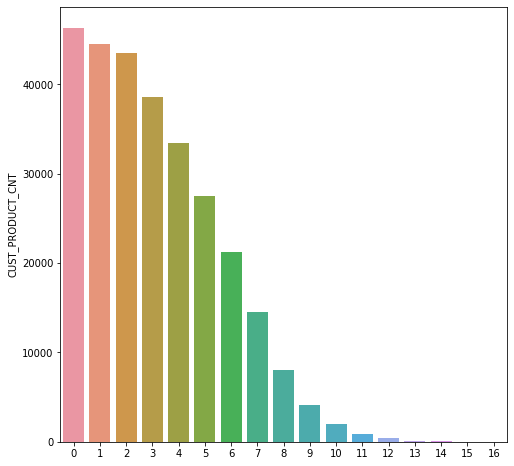

In [69]:
plt.figure(figsize=(8, 8))
sns.barplot(df["CUST_PRODUCT_CNT"].value_counts(dropna=False).keys()[:20],
            df["CUST_PRODUCT_CNT"].value_counts(dropna=False)[:20])

plt.show()

In [70]:
# 类别特征的个数有多少个？
for f in category_feature:
    print(f, '类型数：', df[f].nunique())

IDF_TYP_CD 类型数： 18
GENDER 类型数： 3
CUST_EUP_ACCT_FLAG 类型数： 2
CUST_AU_ACCT_FLAG 类型数： 2
CUST_SALARY_FINANCIAL_FLAG 类型数： 2
CUST_SOCIAL_SECURITYIC_FLAG 类型数： 1
CUST_MTFLOW_FLAG 类型数： 1
CUST_DOLLER_FLAG 类型数： 2
CUST_INTERNATIONAL_GOLD_FLAG 类型数： 2
CUST_INTERNATIONAL_COMMON_FLAG 类型数： 2
CUST_INTERNATIONAL_SIL_FLAG 类型数： 2
CUST_INTERNATIONAL_DIAMOND_FLAG 类型数： 2
CUST_GOLD_COMMON_FLAG 类型数： 2
CUST_STAD_PLATINUM_FLAG 类型数： 2
CUST_LUXURY_PLATINUM_FLAG 类型数： 2
CUST_PLATINUM_FINANCIAL_FLAG 类型数： 2
CUST_DIAMOND_FLAG 类型数： 2
CUST_INFINIT_FLAG 类型数： 2
CUST_BUSINESS_FLAG 类型数： 2
DEP_SA_FLAG 类型数： 2
DEP_TD_FLAG 类型数： 2
LOAN_FLAG 类型数： 2
FUND_FLAG 类型数： 2
C_FUND_FLAG 类型数： 3
D_FUND_FLAG 类型数： 3
S_FUND_FLAG 类型数： 3
BOND_FLAG 类型数： 2
CER_BOND_FLAG 类型数： 2
BK_BOND_FLAG 类型数： 1
CRED_FLAG 类型数： 2
RELATED_REPAY_FLAG 类型数： 2
TOT_REPAY_FLAG 类型数： 2


## 3. 异常值处理 

+ 当你发现异常值后，一定要先分清是什么原因导致的异常值，然后再考虑如何处理。首先，如果这一异常值并不代表一种规律性的，而是极其偶然的现象，或者说你并不想研究这种偶然的现象，这时可以将其删除。其次，如果异常值存在且代表了一种真实存在的现象，那就不能随便删除。在现有的欺诈场景中很多时候欺诈数据本身相对于正常数据勒说就是异常的，我们要把这些异常点纳入，重新拟合模型，研究其规律。能用监督的用监督模型，不能用的还可以考虑用异常检测的算法来做。

### 3.1 异常值检测常用的方法：均方差 

+ 在统计学中，如果一个数据分布近似正态，那么大约 68% 的数据值会在均值的一个标准差范围内，大约 95% 会在两个标准差范围内，大约 99.7% 会在三个标准差范围内。

In [71]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

+ 得到特征的异常值后可以进一步分析变量异常值和目标变量的关系

In [72]:
df_data = df.copy()
for fea in numerical_feature:
    df_data = find_outliers_by_3segama(df_data, fea)
    print(df_data[fea + '_outliers'].value_counts())
    print(df_data.groupby(fea + '_outliers')['bad_good'].sum())
    print('-'*50)

正常值    283162
异常值      2123
Name: OPEN_ORG_NUM_outliers, dtype: int64
OPEN_ORG_NUM_outliers
异常值       7
正常值    4877
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    273482
异常值     11803
Name: LAST_OPEN_TENURE_DAYS_outliers, dtype: int64
LAST_OPEN_TENURE_DAYS_outliers
异常值     339
正常值    4545
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283684
异常值      1601
Name: G_OS_PRCP_SUM_outliers, dtype: int64
G_OS_PRCP_SUM_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283691
异常值      1594
Name: OS_PRCP_SUM_THREE_outliers, dtype: int64
OS_PRCP_SUM_THREE_outliers
异常值       7
正常值    4877
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283691
异常值      1594
Name: OS_PRCP_SUM_SIX_outliers, dtype: int64
OS_PRCP_SUM_SIX_outliers
异常值       7
正常值    4877
Name: bad_good, dtype: int64
-----------------------------------

正常值    284960
异常值       325
Name: L6_CUST_YBT_AVGAMT_outliers, dtype: int64
L6_CUST_YBT_AVGAMT_outliers
异常值      17
正常值    4867
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285232
异常值        53
Name: L3_CUST_METAL_AVGAMT_outliers, dtype: int64
L3_CUST_METAL_AVGAMT_outliers
异常值       2
正常值    4882
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285226
异常值        59
Name: L6_CUST_METAL_AVGAMT_outliers, dtype: int64
L6_CUST_METAL_AVGAMT_outliers
异常值       2
正常值    4882
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285276
异常值         9
Name: L3_CUST_PRIDEPT_AVGAMT_outliers, dtype: int64
L3_CUST_PRIDEPT_AVGAMT_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285276
异常值         9
Name: L6_CUST_PRIDEPT_AVGAMT_outliers, dtype: int64
L6_CUST_PRIDEPT_AVGAMT_outliers
异常值       0
正常值    4884
Name: bad_good, 

正常值    284825
异常值       460
Name: L3_DEP_SA_NEW_ACCOUNT_CNT_outliers, dtype: int64
L3_DEP_SA_NEW_ACCOUNT_CNT_outliers
异常值       8
正常值    4876
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284576
异常值       709
Name: L6_DEP_SA_NEW_ACCOUNT_CNT_outliers, dtype: int64
L6_DEP_SA_NEW_ACCOUNT_CNT_outliers
异常值      11
正常值    4873
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    279503
异常值      5782
Name: DEP_SA_FGCR_ACCOUNT_CNT_outliers, dtype: int64
DEP_SA_FGCR_ACCOUNT_CNT_outliers
异常值     262
正常值    4622
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    282857
异常值      2428
Name: DEP_SA_ACCOUNT_CNT_outliers, dtype: int64
DEP_SA_ACCOUNT_CNT_outliers
异常值     182
正常值    4702
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: DEP_SA_FGCR_BAL_outliers, dtype: int64
DEP_SA_FGCR_BAL_outliers
正常值    4884
Name: bad_good, dtype: int64
-----

正常值    284886
异常值       399
Name: L3DEP_SA_FGCR_MOTH_MAX_IN_AMT_outliers, dtype: int64
L3DEP_SA_FGCR_MOTH_MAX_IN_AMT_outliers
异常值      16
正常值    4868
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284919
异常值       366
Name: L3DEP_SA_FGCR_DAY_MAX_OUT_AMT_outliers, dtype: int64
L3DEP_SA_FGCR_DAY_MAX_OUT_AMT_outliers
异常值      14
正常值    4870
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284836
异常值       449
Name: L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT_outliers, dtype: int64
L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT_outliers
异常值      19
正常值    4865
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284823
异常值       462
Name: L6DEP_SA_FGCR_DAY_MAX_IN_AMT_outliers, dtype: int64
L6DEP_SA_FGCR_DAY_MAX_IN_AMT_outliers
异常值      21
正常值    4863
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284805
异常值       480
Name: L6DEP_SA_FGCR_MOTH_MAX_IN_AMT_outliers, dtype:

正常值    285267
异常值        18
Name: CHANNEL_CTR_FUND_AMT_outliers, dtype: int64
CHANNEL_CTR_FUND_AMT_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285256
异常值        29
Name: CHANNEL_CTR_FUND_CNT_outliers, dtype: int64
CHANNEL_CTR_FUND_CNT_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285278
异常值         7
Name: CHANNEL_CTR_FINANCIAL_AMT_outliers, dtype: int64
CHANNEL_CTR_FINANCIAL_AMT_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285274
异常值        11
Name: CHANNEL_CTR_FINANCIAL_CNT_outliers, dtype: int64
CHANNEL_CTR_FINANCIAL_CNT_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285260
异常值        25
Name: CHANNEL_CTR_INSURE_AMT_outliers, dtype: int64
CHANNEL_CTR_INSURE_AMT_outliers
异常值       2
正常值    4

正常值    285285
Name: L3_CHANNEL_WEBBANK_GLOAN_MONTHAV_outliers, dtype: int64
L3_CHANNEL_WEBBANK_GLOAN_MONTHAV_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: L3_CHANNEL_WEBBANK_GLOAN_MONTHA0_outliers, dtype: int64
L3_CHANNEL_WEBBANK_GLOAN_MONTHA0_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285034
异常值       251
Name: L6_CHANNEL_WEBBANK_FUND_MONTHAVG_outliers, dtype: int64
L6_CHANNEL_WEBBANK_FUND_MONTHAVG_outliers
异常值       5
正常值    4879
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284574
异常值       711
Name: L6_CHANNEL_WEBBANK_FUND_MONTHAV0_outliers, dtype: int64
L6_CHANNEL_WEBBANK_FUND_MONTHAV0_outliers
异常值       8
正常值    4876
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285171
异常值       114
Name: L6_CHANNEL_WEBBANK_FINANCIAL_MON_outliers, dtype: int64
L6_CHANNEL_WEBBANK

正常值    284280
异常值      1005
Name: L3_CHANNEL_CTR_AVG_AMT_outliers, dtype: int64
L3_CHANNEL_CTR_AVG_AMT_outliers
异常值      28
正常值    4856
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283563
异常值      1722
Name: L3_CHANNEL_CTR_AVG_CNT_outliers, dtype: int64
L3_CHANNEL_CTR_AVG_CNT_outliers
异常值      31
正常值    4853
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    282843
异常值      2442
Name: L3_CHANNEL_CTR_IN_MAX_AMT_outliers, dtype: int64
L3_CHANNEL_CTR_IN_MAX_AMT_outliers
异常值      60
正常值    4824
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    282842
异常值      2443
Name: L3_CHANNEL_CASH_IN_MAX_AMT_outliers, dtype: int64
L3_CHANNEL_CASH_IN_MAX_AMT_outliers
异常值      60
正常值    4824
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283941
异常值      1344
Name: L3_CHANNEL_TRANS_IN_MAX_AMT_outliers, dtype: int64
L3_CHANNEL_TRANS_IN_MAX_AMT_outliers


正常值    284599
异常值       686
Name: L6_CHANNEL_MOBILE_AVG_AMT_outliers, dtype: int64
L6_CHANNEL_MOBILE_AVG_AMT_outliers
异常值      14
正常值    4870
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284718
异常值       567
Name: L6_CHANNEL_MOBILE_AVG_CNT_outliers, dtype: int64
L6_CHANNEL_MOBILE_AVG_CNT_outliers
异常值       3
正常值    4881
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284435
异常值       850
Name: L6_CHANNEL_MOBILE_IN_MAX_AMT_outliers, dtype: int64
L6_CHANNEL_MOBILE_IN_MAX_AMT_outliers
异常值      30
正常值    4854
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284820
异常值       465
Name: L6_CHANNEL_MOBILE_IN_MIN_AMT_outliers, dtype: int64
L6_CHANNEL_MOBILE_IN_MIN_AMT_outliers
异常值      12
正常值    4872
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284346
异常值       939
Name: L6_CHANNEL_MOBILE_OUT_MAX_AMT_outliers, dtype: int64
L6_CHANNEL_MO

正常值    280157
异常值      5128
Name: L3_CHANNEL_AUTO_CASH_OUT_MIN_AMT_outliers, dtype: int64
L3_CHANNEL_AUTO_CASH_OUT_MIN_AMT_outliers
异常值      54
正常值    4830
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285023
异常值       262
Name: L3_CHANNEL_AUTO_TRANS_OUT_MIN_AM_outliers, dtype: int64
L3_CHANNEL_AUTO_TRANS_OUT_MIN_AM_outliers
异常值       1
正常值    4883
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284116
异常值      1169
Name: L6_CHANNEL_AUTO_AVG_AMT_outliers, dtype: int64
L6_CHANNEL_AUTO_AVG_AMT_outliers
异常值      26
正常值    4858
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284354
异常值       931
Name: L6_CHANNEL_AUTO_AVG_CNT_outliers, dtype: int64
L6_CHANNEL_AUTO_AVG_CNT_outliers
异常值      14
正常值    4870
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    272214
异常值     13071
Name: L6_CHANNEL_AUTO_IN_MAX_AMT_outliers, dtype: int64
L6_CHANN

正常值    284515
异常值       770
Name: L6_CHANNEL_MSPOS_DEBIT_AVG_AMT_outliers, dtype: int64
L6_CHANNEL_MSPOS_DEBIT_AVG_AMT_outliers
异常值       3
正常值    4881
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284320
异常值       965
Name: L6_CHANNEL_MSPOS_DEBIT_AVG_CNT_outliers, dtype: int64
L6_CHANNEL_MSPOS_DEBIT_AVG_CNT_outliers
异常值       4
正常值    4880
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284986
异常值       299
Name: L6_CHANNEL_MSPOS_CREDIT_AVG_AMT_outliers, dtype: int64
L6_CHANNEL_MSPOS_CREDIT_AVG_AMT_outliers
异常值       4
正常值    4880
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284450
异常值       835
Name: L6_CHANNEL_MSPOS_CREDIT_AVG_CNT_outliers, dtype: int64
L6_CHANNEL_MSPOS_CREDIT_AVG_CNT_outliers
异常值      17
正常值    4867
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284443
异常值       842
Name: L6_CHANNEL_DAY_MSPOS_DEBIT_MAXAM_o

正常值    283764
异常值      1521
Name: L6_CHANNEL_DAY_OTRPOS_DEBIT_MAXA_outliers, dtype: int64
L6_CHANNEL_DAY_OTRPOS_DEBIT_MAXA_outliers
异常值      31
正常值    4853
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285284
异常值         1
Name: L6_CHANNEL_DAY_OTRPOS_CREDIT_MAX_outliers, dtype: int64
L6_CHANNEL_DAY_OTRPOS_CREDIT_MAX_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285238
异常值        47
Name: L6_CHANNEL_DAY_OTRPOS_DEBIT_MINA_outliers, dtype: int64
L6_CHANNEL_DAY_OTRPOS_DEBIT_MINA_outliers
异常值       3
正常值    4881
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: L6_CHANNEL_DAY_OTRPOS_CREDIT_MIN_outliers, dtype: int64
L6_CHANNEL_DAY_OTRPOS_CREDIT_MIN_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283528
异常值      1757
Name: L6_CHANNEL_SIGLE_OTRPOS_DEBIT_MA_outliers, dtype

正常值    283475
异常值      1810
Name: CHANNEL_CTR_DOUTTA_CNT_outliers, dtype: int64
CHANNEL_CTR_DOUTTA_CNT_outliers
异常值      40
正常值    4844
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284871
异常值       414
Name: L3_CHANNEL_CTR_STAIN_AVGAMT_outliers, dtype: int64
L3_CHANNEL_CTR_STAIN_AVGAMT_outliers
异常值      18
正常值    4866
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284575
异常值       710
Name: L3_CHANNEL_CTR_SOUTTA_AVGAMT_outliers, dtype: int64
L3_CHANNEL_CTR_SOUTTA_AVGAMT_outliers
异常值      21
正常值    4863
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284064
异常值      1221
Name: L3_CHANNEL_CTR_DTAIN_AVGAMT_outliers, dtype: int64
L3_CHANNEL_CTR_DTAIN_AVGAMT_outliers
异常值      31
正常值    4853
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284501
异常值       784
Name: L3_CHANNEL_CTR_DOUTTA_AVGAMT_outliers, dtype: int64
L3_CHANNEL_CTR_DOU

正常值    283760
异常值      1525
Name: CHANNEL_WEB_SOUTTA_CNT_outliers, dtype: int64
CHANNEL_WEB_SOUTTA_CNT_outliers
异常值      18
正常值    4866
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    283834
异常值      1451
Name: CHANNEL_WEB_DTAIN_CNT_outliers, dtype: int64
CHANNEL_WEB_DTAIN_CNT_outliers
异常值      12
正常值    4872
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284926
异常值       359
Name: CHANNEL_WEB_DOUTTA_CNT_outliers, dtype: int64
CHANNEL_WEB_DOUTTA_CNT_outliers
异常值       2
正常值    4882
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284686
异常值       599
Name: L3_CHANNEL_WEB_STAIN_AVGAMT_outliers, dtype: int64
L3_CHANNEL_WEB_STAIN_AVGAMT_outliers
异常值       9
正常值    4875
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284436
异常值       849
Name: L3_CHANNEL_WEB_SOUTTA_AVGAMT_outliers, dtype: int64
L3_CHANNEL_WEB_SOUTTA_AVGAMT_outliers
异常值 

正常值    285257
异常值        28
Name: CHANNEL_TEL_DTAIN_AMT_outliers, dtype: int64
CHANNEL_TEL_DTAIN_AMT_outliers
异常值       1
正常值    4883
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285234
异常值        51
Name: CHANNEL_TEL_DOUTTA_AMT_outliers, dtype: int64
CHANNEL_TEL_DOUTTA_AMT_outliers
异常值       1
正常值    4883
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: CHANNEL_TEL_STAIN_CNT_outliers, dtype: int64
CHANNEL_TEL_STAIN_CNT_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285279
异常值         6
Name: CHANNEL_TEL_SOUTTA_CNT_outliers, dtype: int64
CHANNEL_TEL_SOUTTA_CNT_outliers
异常值       0
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285231
异常值        54
Name: CHANNEL_TEL_DTAIN_CNT_outliers, dtype: int64
CHANNEL_TEL_DTAIN_CNT_outliers
异常值       1
正常值    4883
Name: bad_good, dtype: int64
---

正常值    285047
异常值       238
Name: L6_CHANNEL_MOB_STAIN_AVGAMT_outliers, dtype: int64
L6_CHANNEL_MOB_STAIN_AVGAMT_outliers
异常值       4
正常值    4880
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284744
异常值       541
Name: L6_CHANNEL_MOB_SOUTTA_AVGAMT_outliers, dtype: int64
L6_CHANNEL_MOB_SOUTTA_AVGAMT_outliers
异常值      12
正常值    4872
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284964
异常值       321
Name: L6_CHANNEL_MOB_DTAIN_AVGAMT_outliers, dtype: int64
L6_CHANNEL_MOB_DTAIN_AVGAMT_outliers
异常值       4
正常值    4880
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284260
异常值      1025
Name: L6_CHANNEL_MOB_DOUTTA_AVGAMT_outliers, dtype: int64
L6_CHANNEL_MOB_DOUTTA_AVGAMT_outliers
异常值      12
正常值    4872
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    284749
异常值       536
Name: L6_CHANNEL_MOB_STAIN_AVGCNT_outliers, dtype: int64
L6_CHAN

正常值    285285
Name: L3_CHANNEL_TXN_STAIN_AVGAMT_outliers, dtype: int64
L3_CHANNEL_TXN_STAIN_AVGAMT_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: L3_CHANNEL_TXN_SOUTTA_AVGAMT_outliers, dtype: int64
L3_CHANNEL_TXN_SOUTTA_AVGAMT_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: L3_CHANNEL_TXN_DTAIN_AVGAMT_outliers, dtype: int64
L3_CHANNEL_TXN_DTAIN_AVGAMT_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: L3_CHANNEL_TXN_DOUTTA_AVGAMT_outliers, dtype: int64
L3_CHANNEL_TXN_DOUTTA_AVGAMT_outliers
正常值    4884
Name: bad_good, dtype: int64
--------------------------------------------------
正常值    285285
Name: L3_CHANNEL_TXN_STAIN_AVGCNT_outliers, dtype: int64
L3_CHANNEL_TXN_STAIN_AVGCNT_outliers
正常值    4884
Name: bad_good, dtype: int64
-----------------------------------------------

+ 例如可以看到异常值在两个变量上的分布几乎复合整体的分布

# 4. 特征编码

+ labelEncode 直接放入树模型中

In [75]:
# ‘category_feature’类别特征需要进行转换

for col in tqdm(category_feature):
    le = LabelEncoder()
    le.fit(list(df[col].astype(str).values))
    df[col] = le.transform(list(df[col].astype(str).values))
    
print('Label Encoding 完成')

100%|██████████| 32/32 [00:08<00:00,  3.63it/s]

Label Encoding 完成


# 5. 逻辑回归等模型要单独增加的特征工程

+ 对特征做归一化，去除相关性高的特征
+ 归一化目的是让训练过程更好更快的收敛，避免特征大吃小的问题
+ 去除相关性是增加模型的可解释性，加快预测过程。

# 6. 特征选择

+ 特征选择技术可以精简掉无用的特征，以降低最终模型的复杂性，它的最终目的是得到一个简约模型，在不降低预测准确率或对预测准确率影响不大的情况下提高计算速度。特征选择不是为了减少训练时间（实际上，一些技术会增加总体训练时间），而是为了减少模型评分时间。

+ 本数据集中我们删除非入模特征后，并对缺失值填充，然后用计算协方差的方式看一下特征间相关性，然后进行模型训练

In [76]:
df.head()

,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_

In [77]:
x_train = df.drop(['bad_good'], axis=1)

#计算协方差
data_corr = x_train.corrwith(df['bad_good']) #计算跟目标值的相关性
result = pd.DataFrame(columns=['features', 'corr'])
result['features'] = data_corr.index
result['corr'] = data_corr.values

<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

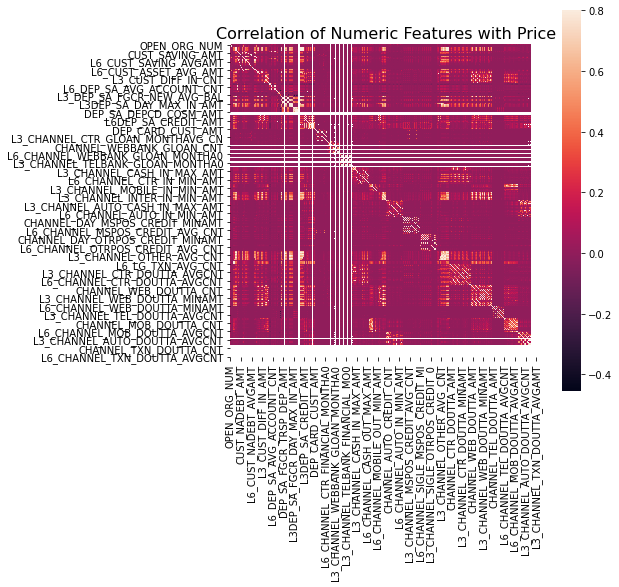

In [78]:
# 当然也可以直接看图
data_numeric = df[numerical_feature]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [81]:
df.head()

,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,bad_good,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_

# 7.切分训练集和测试集

In [84]:
y = df[['bad_good']]

In [85]:
y.head()

,bad_good
0,0
1,0
2,1
3,0
4,0


In [88]:
features = [f for f in df.columns if f not in ['bad_good']]
x = df[features]

In [92]:
x.head()

,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,L3_CR_CNT,CR_AMT,CR_CNT,CUST_ACCOUNT_CNT,CUST_PRODUCT_CNT,CUST_SAVING_AMT,CUST_FINA_AMT,CUST_PRIFINA_AMT,CUST_FOND_AMT,CUST_NADEBT_AMT,CUST_YBT_AMT,CUST_METAL_AMT,CUST_AUM,CUST_EUP_ACCT_FLAG,CUST_AU_ACCT_FLAG,CUST_SALARY_FINANCIAL_FLAG,CUST_SOCIAL_SECURITYIC_FLAG,CUST_MTFLOW_FLAG,CUST_DOLLER_FLAG,CUST_INTERNATIONAL_GOLD_FLAG,CUST_INTERNATIONAL_COMMON_FLAG,CUST_INTERNATIONAL_SIL_FLAG,CUST_INTERNATIONAL_DIAMOND_FLAG,CUST_GOLD_COMMON_FLAG,CUST_STAD_PLATINUM_FLAG,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT,L3_CUST_AVG_AUM,L6_CUST_AVG_AUM,L3_CUST_SAVING_AVGAMT,L6_CUST_SAVING_AVGAMT,L3_CUST_FINA_AVGAMT,L6_CUST_FINA_AVGAMT,L3_CUST_PRIFINA_AVGAMT,L6_CUST_PRIFINA_AVGAMT,L3_CUST_FOND_AVGAMT,L6_CUST_FOND_AVGAMT,L3_CUST_NADEBT_AVGAMT,L6_CUST_NADEBT_AVGAMT,L3_CUST_YBT_AVGAMT,L6_CUST_YBT_AVGAMT,L3_CUST_METAL_AVGAMT,L6_CUST_METAL_AVGAMT,L3_CUST_PRIDEPT_AVGAMT,L6_CUST_PRIDEPT_AVGAMT,L3_CUST_ASSET_AVG_AMT,L6_CUST_ASSET_AVG_AMT,L3_CUST_DEBT_AVG_AMT,L6_CUST_DEBT_AVG_AMT,CUST_SAME_IN_AMT,CUST_DIFF_IN_AMT,CUST_SAME_OUT_AMT,CUST_DIFF_OUT_AMT,CUST_SAME_IN_CNT,CUST_DIFF_IN_CNT,CUST_SAME_OUT_CNT,CUST_DIFF_OUT_CNT,L3_CUST_SAME_IN_AMT,L3_CUST_DIFF_IN_AMT,L3_CUST_SAME_OUT_AMT,L3_CUST_DIFF_OUT_AMT,L3_CUST_SAME_IN_CNT,L3_CUST_DIFF_IN_CNT,L3_CUST_SAME_OUT_CNT,L3_CUST_DIFF_OUT_CNT,L6_CUST_SAME_IN_AMT,L6_CUST_DIFF_IN_AMT,L6_CUST_SAME_OUT_AMT,L6_CUST_DIFF_OUT_AMT,L6_CUST_SAME_IN_CNT,L6_CUST_DIFF_IN_CNT,L6_CUST_SAME_OUT_CNT,L6_CUST_DIFF_OUT_CNT,DEP_SA_FLAG,DEP_SA_OPEN_TENURE_DAYS,DEP_SA_LAST_TENURE_DAYS,DEP_SA_AVG_TENURE_DAYS,DEP_SA_SUMACCOUNT_CNT,L3_DEP_SA_AVG_ACCOUNT_CNT,L6_DEP_SA_AVG_ACCOUNT_CNT,DEP_SA_NEW_ACCOUNT_CNT,L3_DEP_SA_NEW_ACCOUNT_CNT,L6_DEP_SA_NEW_ACCOUNT_CNT,DEP_SA_FGCR_ACCOUNT_CNT,DEP_SA_ACCOUNT_CNT,DEP_SA_FGCR_BAL,L3_DEP_SA_FGCR_BAL,L6_DEP_SA_FGCR_BAL,DEP_SA_BAL,L3_DEP_SA_BAL,L6_DEP_SA_BAL,DEP_SA_NEW_BAL,L3_DEP_SA_NEW_AVG_BAL,L6_DEP_SA_NEW_AVG_BAL,DEP_SA_FGCR_NEW_BAL,L3_DEP_SA_FGCR_NEW_AVG_BAL,L6_DEP_SA_FGCR_NEW_AVG_BAL,DEP_SA_TRSP_DEP_AMT,DEP_SA_TRSP_WITD_AMT,DEP_SA_FGCR_TRSP_DEP_AMT,DEP_SA_FGCR_TRSP_WITD_AMT,DEP_SA_FIXTCUR_AMT,DEP_SA_FGCR_FIXTCUR_AMT,DEP_SA_DAY_MAX_IN_AMT,DEP_SA_MOTH_MAX_IN_AMT,DEP_SA_DAY_MAX_OUT_AMT,DEP_SA_MOTH_MAX_OUT_AMT,DEP_SA_FGCR_DAY_MAX_IN_AMT,DEP_SA_FGCR_MOTH_MAX_IN_AMT,DEP_SA_FGCR_DAY_MAX_OUT_AMT,DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L3DEP_SA_DAY_MAX_IN_AMT,L3DEP_SA_MOTH_MAX_IN_AMT,L3DEP_SA_DAY_MAX_OUT_AMT,L3DEP_SA_MOTH_MAX_OUT_AMT,L6DEP_SA_DAY_MAX_IN_AMT,L6DEP_SA_MOTH_MAX_IN_AMT,L6DEP_SA_DAY_MAX_OUT_AMT,L6DEP_SA_MOTH_MAX_OUT_AMT,L3DEP_SA_FGCR_DAY_MAX_IN_AMT,L3DEP_SA_FGCR_MOTH_MAX_IN_AMT,L3DEP_SA_FGCR_DAY_MAX_OUT_AMT,L3DEP_SA_FGCR_MOTH_MAX_OUT_AMT,L6DEP_SA_FGCR_DAY_MAX_IN_AMT,L6DEP_SA_FGCR_MOTH_MAX_IN_AMT,L6DEP_SA_FGCR_DAY_MAX_OUT_AMT,L6DEP_SA_FGCR_MOTH_MAX_OUT_AMT,DEP_SA_DEPCD_COSM_AMT,DEP_SA_DEPCD_COSM_CNT,L3DEP_SA_DEPCD_COSM_AVG_AMT,L3DEP_SA_DEPCD_COSM_AVG_CNT,L6DEP_SA_DEPCD_COSM_AVG_AMT,L6DEP_SA_DEPCD_COSM_AVG_CNT,DEP_SA_DEBIT_AMT,DEP_SA_DEBIT_CNT,DEP_SA_CREDIT_AMT,DEP_SA_CREDIT_CNT,L3DEP_SA_DEBIT_AMT,L3DEP_SA_DEBIT_CNT,L3DEP_SA_CREDIT_AMT,L3DEP_SA_CREDIT_CNT,L6DEP_SA_DEBIT_AMT,L6DEP_SA_DEBIT_CNT,L6DEP_SA_CREDIT_AMT,L6DEP_SA_CREDIT_CNT,DEP_SA_DAYAVG_BAL,L3_DEP_SA_DAYAVG_BAL,L6_DEP_SA_DAYAVG_BAL,DEP_TD_FLAG,LOAN_FLAG,FUND_FLAG,C_FUND_FLAG,D_FUND_FLAG,S_FUND_FLAG,BOND_FLAG,CER_BOND_FLAG,BK_BOND_FLAG,CRED_FLAG,RELATED_REPAY_FLAG,TOT_REPAY_FLAG,L3_DEP_CARD_CUST_AMT,L3_DEP_CARD_CUST_CNT,L3_DEP_CARD_CASH_AMT,L3_DEP_CARD_CASH_CNT,L6_DEP_CARD_CUST_AMT,L6_DEP_CARD_CUST_CNT,L6_DEP_CARD_CASH_AMT,L6_DEP_CARD_CASH_CNT,DEP_CARD_CASH_CNT,DEP_CARD_CUST_CNT,DEP_CARD_CASH_AMT,DEP_CARD_CUST_AMT,CHANNEL_CTR_FUND_AMT,CHANNEL_CTR_FUND_CNT,CHANNEL_CTR_FINANCIAL_AMT,CHANNEL_CTR_FINANCIAL_CNT,CHANNEL_CTR_INSURE_AMT,CHANNEL_CTR_INSURE_CN

In [94]:
# 随机划分训练集和测试集。
# test_size表明测试集占整体样本的比例；这里是测试集占到总数的80%
# random_state是随机数种子，当为0时，每次生成的随机数即随机顺序是不相同的，
# 当为固定的数值时，可以在多次运行时获得相同的随机数。
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=40)

In [96]:
# 查看条数
x_test.shape

(57057, 625)

In [95]:
x_train.shape

(228228, 625)

In [142]:
feature_names = list(df.columns.values.tolist())

In [150]:
def cv_model(clf, train_x, train_y, test_x, clf_name):
    folds = 5
    seed = 2020
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []
    
    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        print('train_index: ', train_index, "len", len(train_index))
        print('valid_index: ', valid_index, "len", len(valid_index))
        
        trn_x, trn_y = train_x.iloc[train_index], train_y.iloc[train_index]        
        val_x, val_y = train_x.iloc[valid_index], train_y.iloc[valid_index]

        if clf_name == "xgb":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'eval_metric': 'auc',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.04,
                      'tree_method': 'exact',
                      'seed': 2020,
                      'nthread': 36,
                      "silent": True,
                      }
            
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=200, early_stopping_rounds=200)
            val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            test_pred = model.predict(xgb.DMatrix(test_x), ntree_limit=model.best_ntree_limit)
                 
        train[valid_index] = val_pred
        test = test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        
        print(cv_scores)
        
    print("%s_scotrainre_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    return train, test

采用XGBoost算法进行分类

In [151]:
def xgb_model(x_train, y_train, x_test):
    xgb_train, xgb_test = cv_model(xgb, x_train, y_train, x_test, "xgb")
    return xgb_train, xgb_test

In [152]:
xgb_train, xgb_test = xgb_model(x_train, y_train, x_test)

************************************ 1 ************************************
train_index:  [     0      1      2 ... 228224 228225 228226] len 182582
valid_index:  [     3     12     16 ... 228203 228208 228227] len 45646
[0]	train-auc:1	eval-auc:0.999989
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 200 rounds.
[200]	train-auc:1	eval-auc:0.999979
Stopping. Best iteration:
[0]	train-auc:1	eval-auc:0.999989

[0.999988864142539]
************************************ 2 ************************************
train_index:  [     0      1      2 ... 228224 228226 228227] len 182582
valid_index:  [     4      7     11 ... 228212 228220 228225] len 45646
[0]	train-auc:1	eval-auc:1
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 200 rounds.
[200]	train-auc:1	eval-auc:1
Stopping. Best iteration:
[0]	train-auc:1	eval-auc:1

[0.9999888641

得到Macro-F1值为0.9999977728285078

# 另外附上评分卡的说明



评分卡是一张拥有分数刻度会让相应阈值的表。信用评分卡是用于用户信用的一张刻度表。以下代码是一个非标准评分卡的代码流程，用于刻画用户的信用评分。评分卡是金融风控中常用的一种对于用户信用进行刻画的手段哦！

In [24]:
#评分卡 不是标准评分卡
def Score(prob, P0=600, PDO=20, badrate=None, goodrate=None):
    P0 = P0
    PDO = PDO
    theta0 = badrate/goodrate
    B = PDO/np.log(2)
    A = P0 + B*np.log(2*theta0)
    score = A-B*np.log(prob/(1-prob))
    return score